# 8. Нейронной сети 2

In [1]:
import torch

In [2]:
from setup_libs import *

In [3]:
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

# 8.1 Задача бинарной классификации

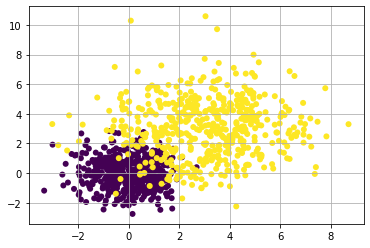

In [4]:
# Generate some data
# Generate some data
X, y = get_clf_dataset(500)

Y = np.vstack([y, 1-y]).T #обратите внимание что двумерный
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.grid()

In [5]:
t_X = torch.FloatTensor(X)
t_y = torch.FloatTensor(Y[:,0]).unsqueeze(-1)

In [7]:
t_y.size()

torch.Size([1000, 1])

## Sigmoid and BCELoss (Binary Cross Entropy)
* [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
* [Sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

In [9]:
model = Sequential(
    Linear(2, 5), # старая добрая линейка
    Linear(5, 1),
    Sigmoid() # сигмоида
)

# Обозначили лосс
criterion = torch.nn.BCELoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    y_pred = model(t_X)
    loss = criterion(y_pred, t_y)
    
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



99 0.5669697523117065
199 0.5348736643791199
299 0.5075054168701172
399 0.4837312400341034
499 0.46278494596481323
599 0.4441266655921936
699 0.4273623526096344
799 0.4121941328048706
899 0.3983916640281677
999 0.38577204942703247
1099 0.3741872310638428
1199 0.3635152578353882
1299 0.3536545932292938
1399 0.3445190489292145
1499 0.3360348045825958
1599 0.3281386196613312
1699 0.3207751214504242
1799 0.3138960599899292
1899 0.3074588179588318
1999 0.3014257848262787


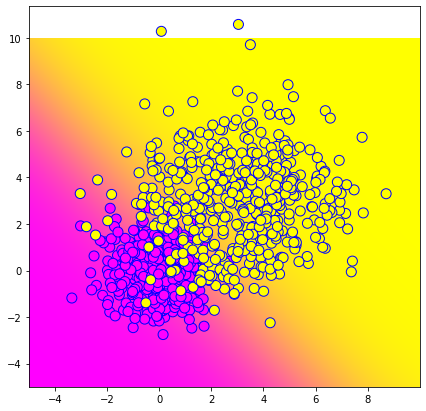

In [10]:
xx, yy = np.meshgrid(np.arange(-5, 10, .01), np.arange(-5, 10,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = model(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=100, cmap='spring', edgecolors='b')

## Производная активации

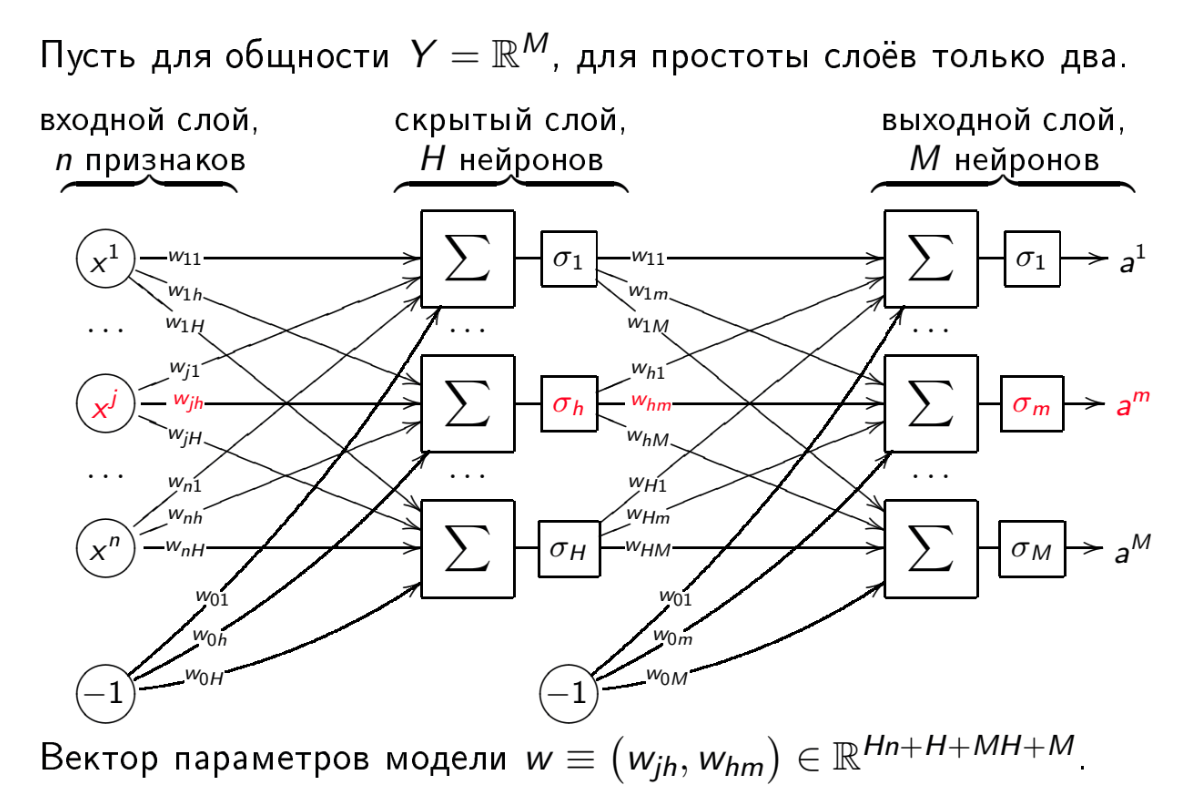

In [179]:
Image('images/2layers.png', width = 400)

$$\frac{\partial L}{\partial u} = \frac{\partial L}{\partial \sigma(u)}\frac{\partial \sigma(u)}{\partial u} = \varepsilon \sigma^{'}$$

$$\sigma = \frac{1}{1 + e^{-x}}$$

# 8.2 Многоклассовая классификация

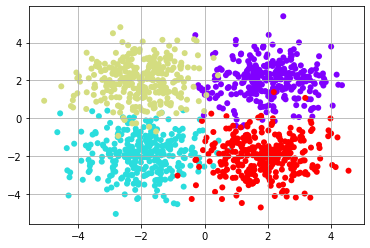

In [11]:
# Generate some data
N = 300

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])
X3 = np.random.randn(N,2) + np.array([-2,2])
X4 = np.random.randn(N,2) + np.array([2,-2])

labels = np.concatenate([np.zeros(N),np.ones(N), 2 * np.ones(N), 3 * np.ones(N)]).astype(np.int64)

X = np.vstack([X1,X2,X3,X4])
plt.scatter(X[:,0],X[:,1], c = labels, cmap='rainbow', edgecolors= 'none')
plt.grid()

## CrossEntropy and SoftMax (NLLLoss + LogSoftMax)

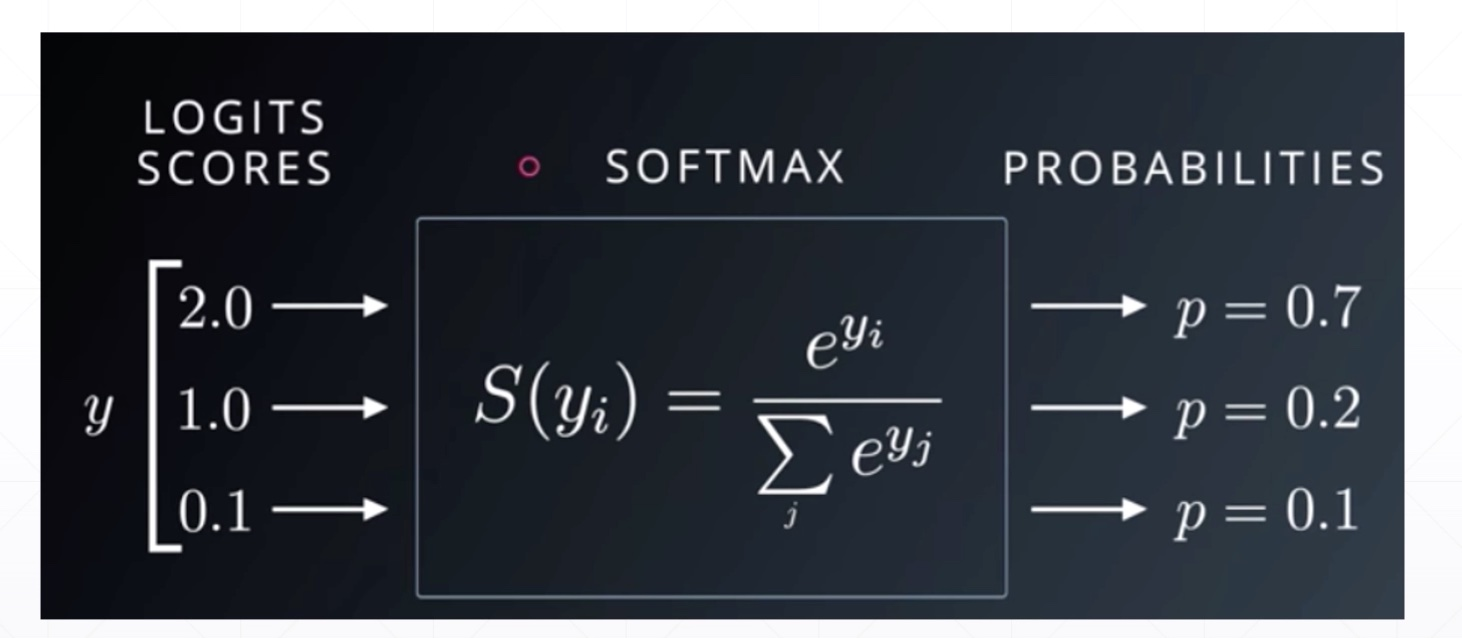

In [7]:
Image('images/softmax2.jpg', width=500)

$$ p_i = SoftMax(y_i) = \frac{e^{y_i}}{\sum_{i=j}e^{y_j}}$$

In [176]:
Softmax()(torch.tensor([1,2,3], dtype=float))

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

$$CrossEntropy = -\sum_{i=1}^{N} log(p_i[real]) \to min$$

[CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)


In [12]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [17]:
model = Sequential(
    Linear(2, 4),
    Linear(4, 4), 
)

# Обозначили лосс
criterion = torch.nn.CrossEntropyLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.6301831603050232
199 0.3478964865207672
299 0.24759165942668915
399 0.20197904109954834
499 0.1766282618045807
599 0.16069607436656952
699 0.1498502790927887
799 0.14204436540603638
899 0.13619184494018555
999 0.13166482746601105


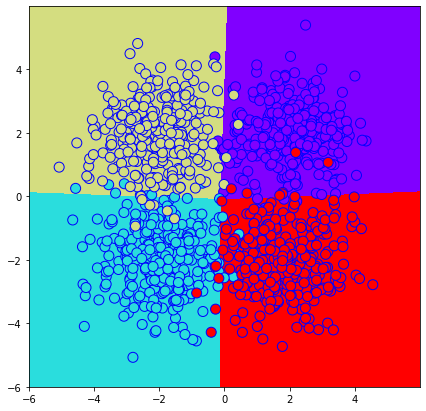

In [18]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

## LogSoftmax + NLLLoss

$$ LogSoftMax(y_i) = log\Big(\frac{e^{y_i}}{\sum_{i=j}e^{z_j}}\Big) $$

$$NLL = -\sum_{i=1}^{n}\log(p_{real-class})$$

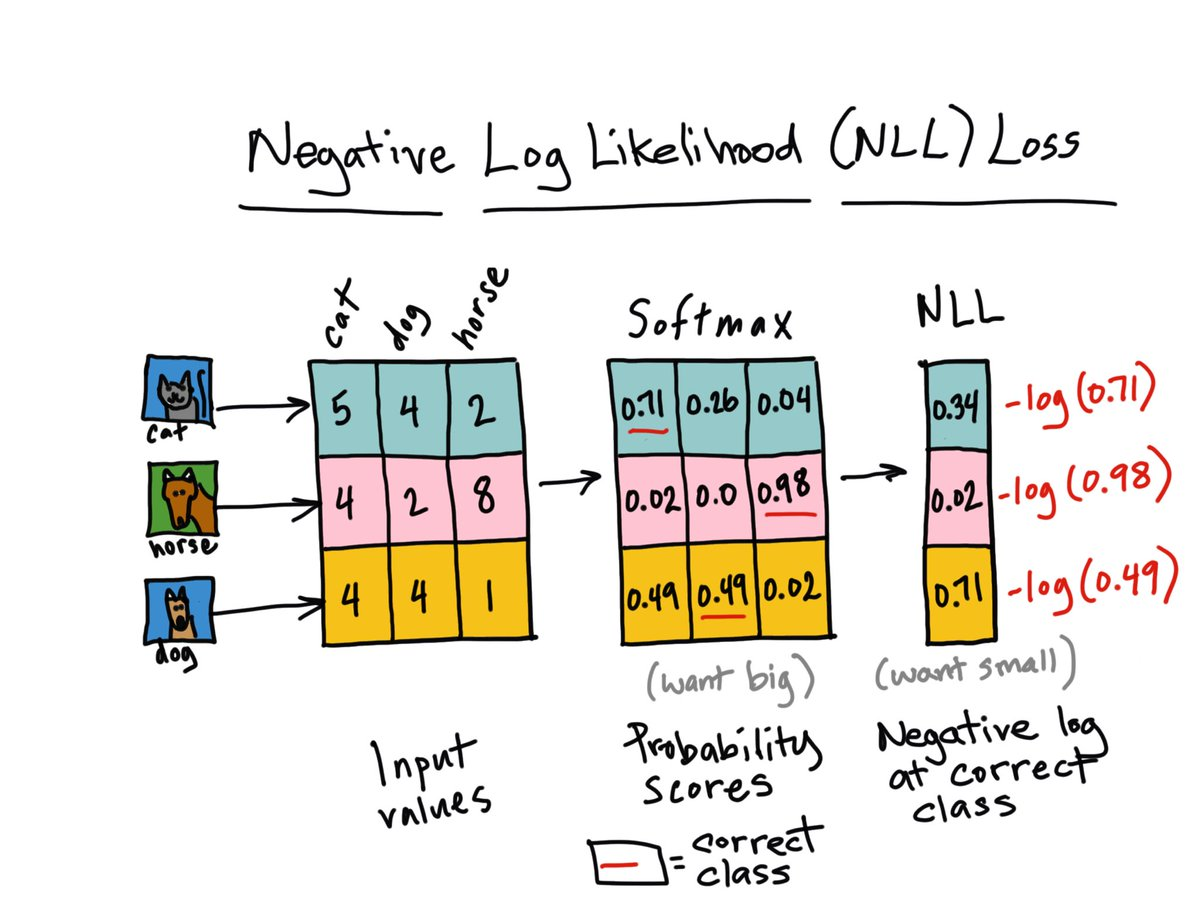

In [187]:
Image('images/nll.jpg', width=500)

In [21]:
model = Sequential(
    Linear(2, 4),
    LogSoftmax()
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    

99 0.6905864477157593
199 0.4311259090900421
299 0.3360706567764282
399 0.28689637780189514
499 0.25635087490081787
599 0.23525507748126984
699 0.2196652740240097
799 0.20759651064872742
899 0.19793209433555603
999 0.1899917721748352


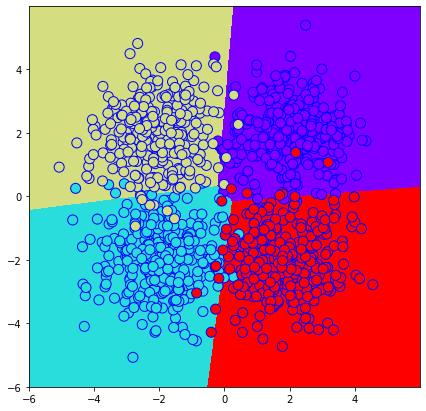

In [22]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

# 8.3 Зачем нужны активации

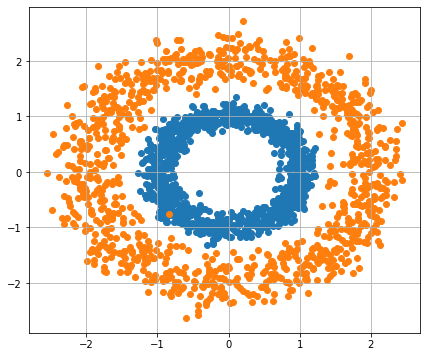

In [23]:
from random import gauss

num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

In [25]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [57]:
model = Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 2),
    LogSoftmax(),
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.5812706351280212
199 0.4976324141025543
299 0.3550008237361908
399 0.25180020928382874
499 0.1997961848974228
599 0.1683761477470398
699 0.14749790728092194
799 0.13253110647201538
899 0.12113379687070847
999 0.11211399734020233


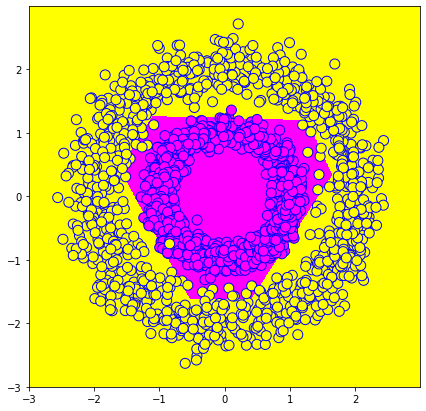

In [58]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='spring', edgecolors='b')

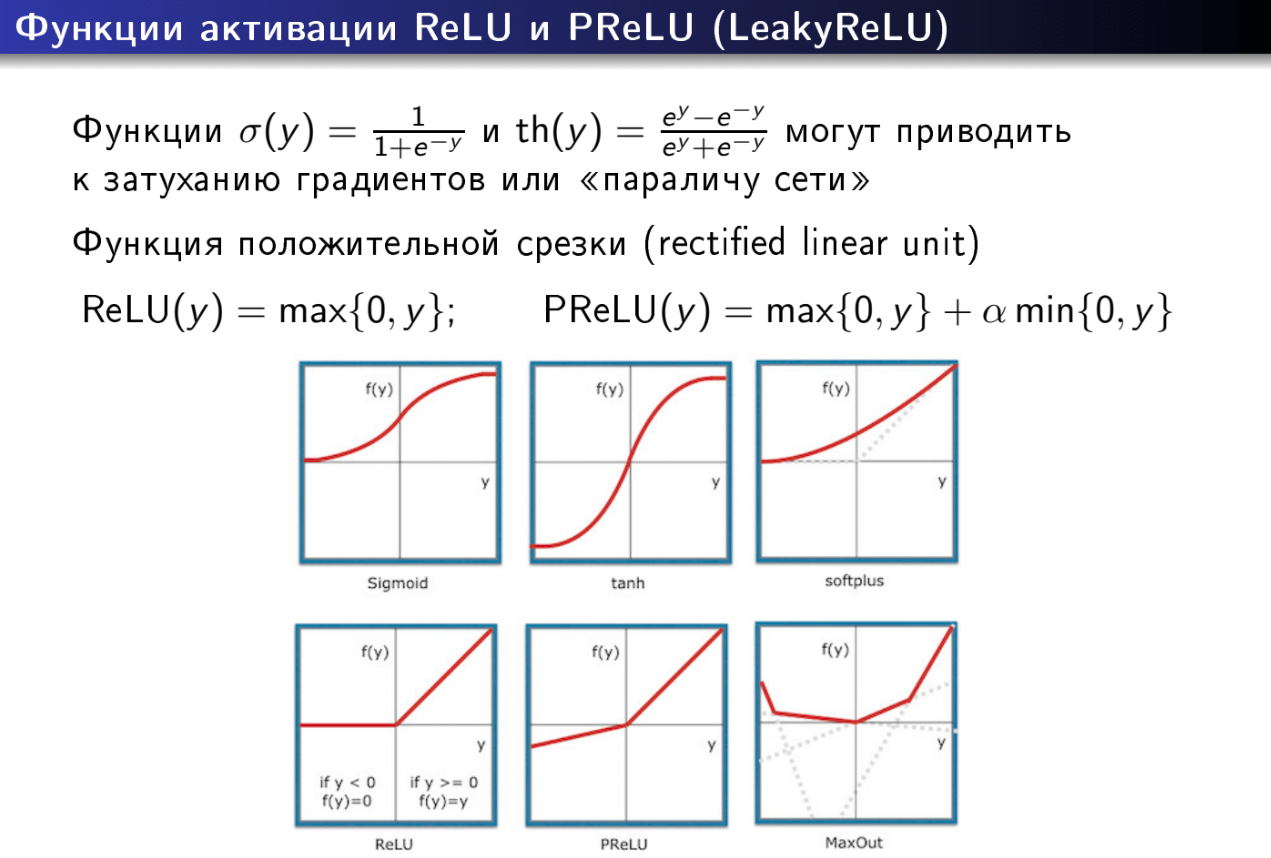

In [216]:
Image('images/activations.png', width=500)

# Ссылки
* [Softmax explanation](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [Multiclass classification](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)